<a href="https://colab.research.google.com/github/Priyankagautam08/8-Real-world-Ml-Projects/blob/main/Project_2_CiFAR_10_Images_Classification_Using_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [ ]:
#load the dataset into test and train
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


[7]


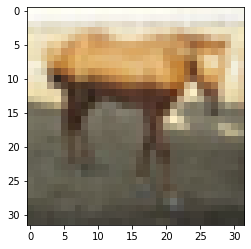

In [ ]:
#visualize data. (value of 1 ranging shows the given class)
i = 2000
plt.imshow(X_train[i])
print(y_train[i])

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


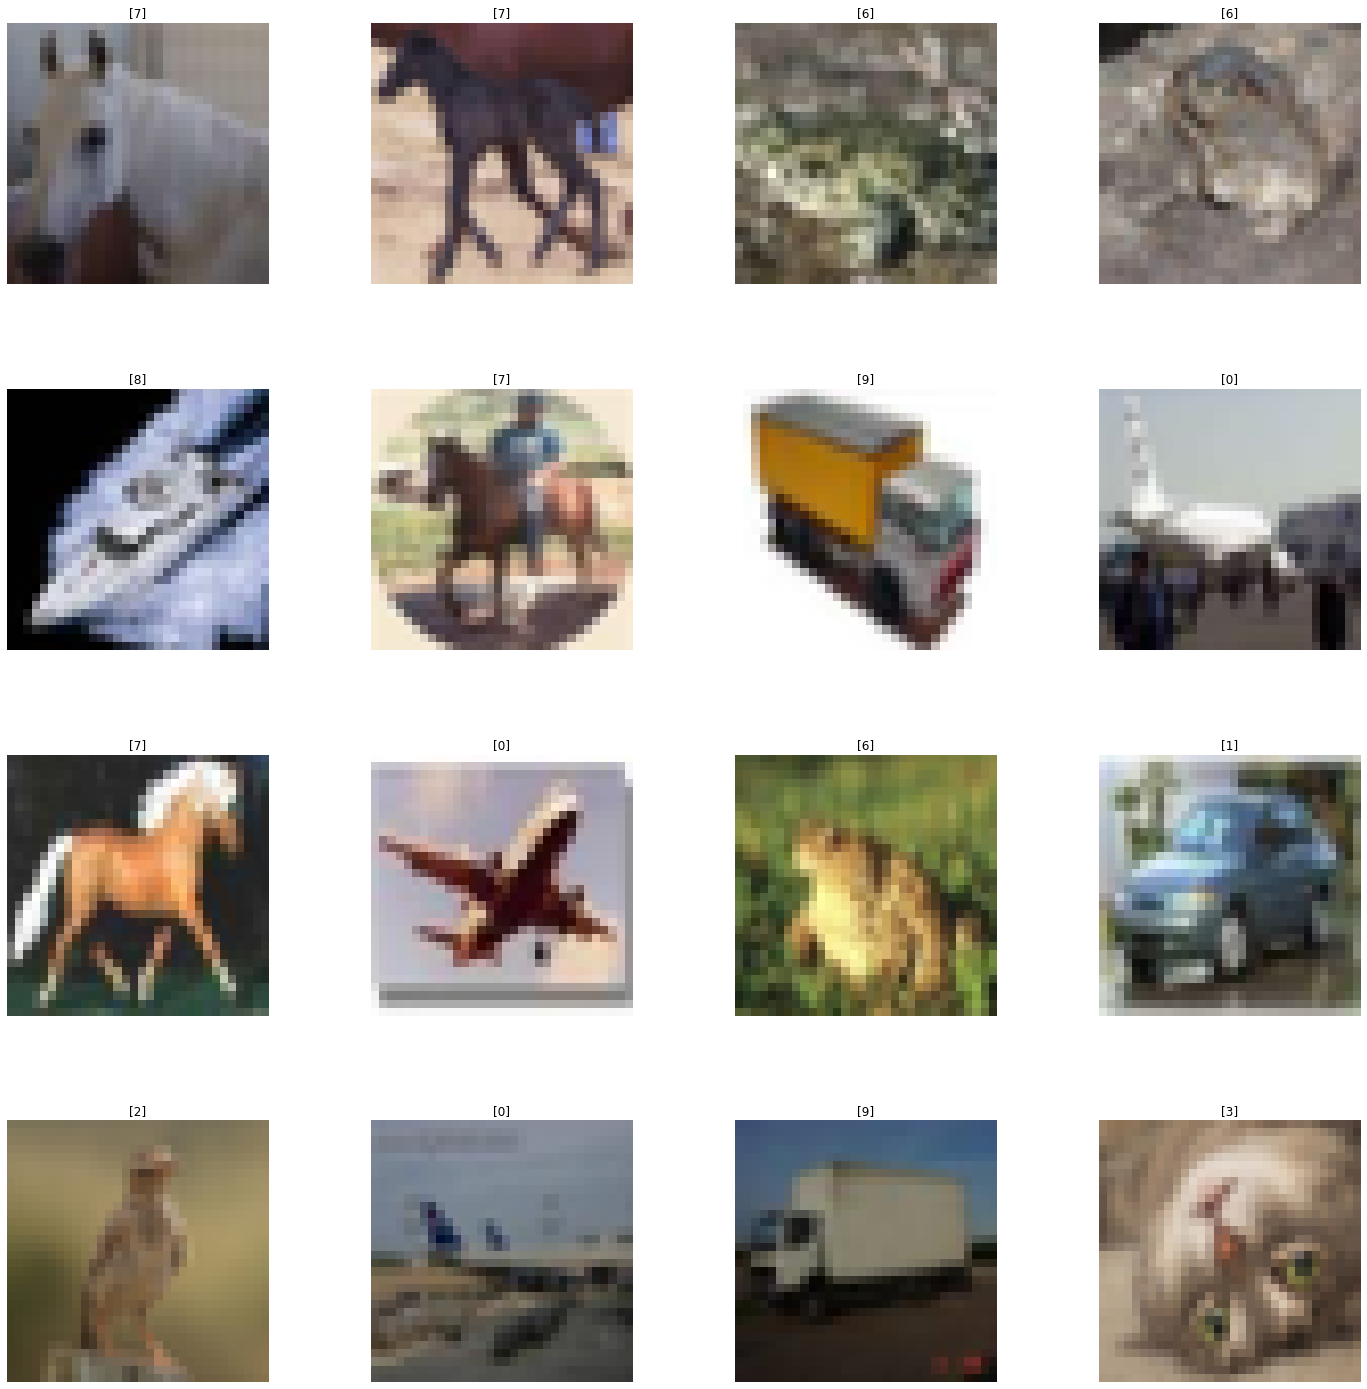

In [ ]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [ ]:
#Data preparation (converting the data in float)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

number_cat = 10 #total 10 category in given dataset

In [ ]:
y_train  #output shown is in 10 clases rangining 1 to 10 representing different clases

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)   #converting the variable into categorical

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [ ]:
y_test


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
#normalization
X_train = X_train/255
X_test = X_test/255
X_train

array([[[[0.00090734, 0.00095348, 0.00096886],
         [0.00066128, 0.00070742, 0.00069204],
         [0.00076894, 0.00073818, 0.00066128],
         ...,
         [0.00242983, 0.00202999, 0.0016609 ],
         [0.00233756, 0.00192234, 0.00156863],
         [0.00227605, 0.00190696, 0.00158401]],

        [[0.00024606, 0.00030757, 0.00030757],
         [0.        , 0.        , 0.        ],
         [0.00027682, 0.00012303, 0.        ],
         ...,
         [0.00189158, 0.00135333, 0.00084583],
         [0.00183007, 0.00127643, 0.00076894],
         [0.0018762 , 0.00133795, 0.00087659]],

        [[0.00038447, 0.00036909, 0.00032295],
         [0.00024606, 0.00010765, 0.        ],
         [0.00075356, 0.00041522, 0.00012303],
         ...,
         [0.00181469, 0.00129181, 0.00076894],
         [0.00184544, 0.00129181, 0.00076894],
         [0.00167628, 0.00112265, 0.00064591]],

        ...,

        [[0.00319877, 0.00261438, 0.00147636],
         [0.00309112, 0.00235294, 0.00052288]

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
Input_shape = X_train.shape[1:]

In [ ]:
Input_shape

(32, 32, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from tensorflow.keras import optimizers

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

In [ ]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 1, shuffle = True)

1563/1563 [==============================] - 538s 343ms/step - loss: 2.3035 - accuracy: 0.1015


In [ ]:
history = cnn_model.fit(X_train, y_train, batch_size = 64, epochs = 2, shuffle = True)

Epoch 1/2
782/782 [==============================] - 488s 624ms/step - loss: 2.3027 - accuracy: 0.0973
Epoch 2/2
782/782 [==============================] - 489s 626ms/step - loss: 2.3027 - accuracy: 0.0984


In [ ]:
history = cnn_model.fit(X_train, y_train, batch_size = 16, epochs = 2, shuffle = True)

Epoch 1/2
3125/3125 [==============================] - 612s 196ms/step - loss: 2.3028 - accuracy: 0.1002
Epoch 2/2
3125/3125 [==============================] - 597s 191ms/step - loss: 2.3028 - accuracy: 0.0977
